#DataFrame manipulation with Pandas

Pandas is a Python library that allows for a wide range of data analysis and manipulation.  While you can build a basic data table using nested lists in Python (similar to an Excel spreadsheet), they become cumbersome to work with. The pandas table data structure — Dataframes allows for easy manipulation of data in a row and column fashion.

---
To load a CSV file into pandas, you first import the library (the pd alias is customary) and then call the **.read_csv()** function like this:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Importing data
import pandas as pd
df = pd.read_csv(r'/watches.csv')


In [ ]:
#url = "http://users.stat.ufl.edu/~winner/data/resid_energy.dat"
#energy_data = pd.read_csv(url, sep=r"\s+", header=None)

# Introduction


Dataframes allow you to structure and filter data more efficiently than when using pure Python. This efficiency is seen in two distinct ways:

Code written using pandas will often run faster than scripts written in pure Python
Code written using pandas will often contain far fewer lines of code than the equivalent code written in pure Python.

The pandas library uses two fundamental data structures/objects:

1) **Series**

2) **DataFrame**

A Series object stores single-column data along with an index. The index enumerates the series object.

A DataFrame object is a two-dimensional tabular data structure with labeled axes. Conceptually, a DataFrame object can be thought of as a collection of Series objects. Namely,each column in a DataFrame as a single Series object.These Series objects shares a common index - the index of the DataFrame object.

# Previwing your data

**.head()** function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

---

**.tail()** is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

In [23]:
df.head()

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5


In [24]:
df.tail()

,model,store,condition,engagement,price
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5
74,Tempo,Watches unlimited,Good,82.405063,4308.0


You can access a column using square brackets and quotes:

In [25]:
df["price"]

0      489.0
1      489.0
2      490.5
3      501.0
4      502.5
       ...  
70    4239.0
71    4282.5
72    4284.0
73     835.5
74    4308.0
Name: price, Length: 75, dtype: float64

In [26]:
df[["price", "engagement"]]

,price,engagement
0,489.0,77.848101
1,489.0,75.696203
2,490.5,72.025316
3,501.0,78.987342
4,502.5,80.126582
...,...,...
70,4239.0,80.379747
71,4282.5,80.506329
72,4284.0,67.088608
73,835.5,79.493671


In [27]:
print(df.dtypes)

model          object
store          object
condition      object
engagement    float64
price         float64
dtype: object


In [28]:
print(df.shape)

(75, 5)


QQ-Plot and Histogram
---
The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential.

A histogram plot lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. Histograms allow for the inspection of data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc


In [29]:
from scipy import stats

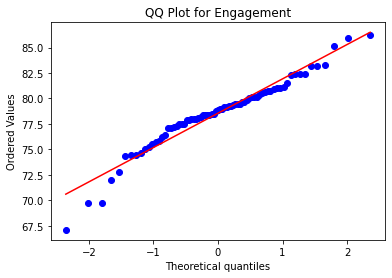

In [30]:
stats.probplot(x=df['engagement'], dist="norm", plot=plt)
plt.title("QQ Plot for Engagement")
plt.show()

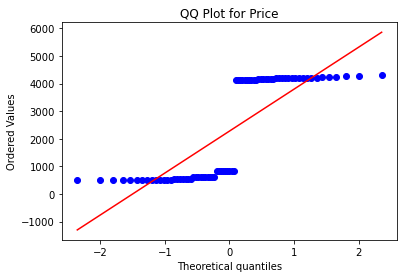

In [31]:
stats.probplot(x=df['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Price")
plt.show()

Text(78.8607594936709, 15.75, '78.86 (median)')

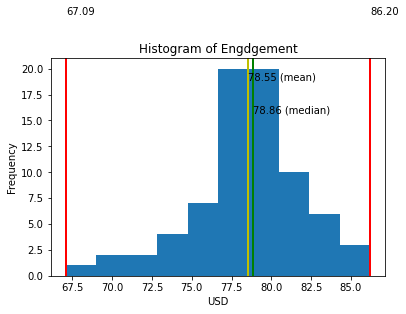

In [32]:
vari_price = df['engagement']
D_close = vari_price.plot.hist()
D_close.set_title('Histogram of Engdgement')
D_close.set_xlabel('USD')
plt.plot()
plt.axvline(vari_price.mean(), color='y', linestyle='solid', linewidth=2)
plt.axvline(vari_price.min(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.max(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.median(), color='g', linestyle='solid', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(vari_price.mean(), max_ylim*0.9, '{:.2f} (mean)'.format(vari_price.mean()))
plt.text(vari_price.max(), max_ylim*1.2, '{:.2f}'.format(vari_price.max()))
plt.text(vari_price.min(), max_ylim*1.2, '{:.2f}'.format(vari_price.min()))
plt.text(vari_price.median(), max_ylim*0.75, '{:.2f} (median)'.format(vari_price.median()))

Text(831.0, 31.5, '831.00 (median)')

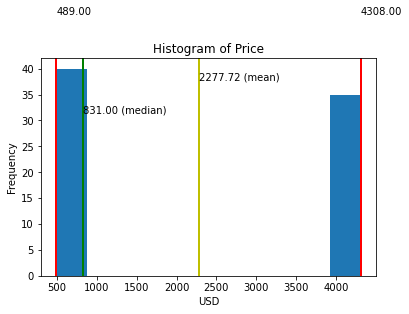

In [33]:
vari_price = df['price']
D_close = vari_price.plot.hist()
D_close.set_title('Histogram of Price')
D_close.set_xlabel('USD')
plt.plot()
plt.axvline(vari_price.mean(), color='y', linestyle='solid', linewidth=2)
plt.axvline(vari_price.min(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.max(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.median(), color='g', linestyle='solid', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(vari_price.mean(), max_ylim*0.9, '{:.2f} (mean)'.format(vari_price.mean()))
plt.text(vari_price.max(), max_ylim*1.2, '{:.2f}'.format(vari_price.max()))
plt.text(vari_price.min(), max_ylim*1.2, '{:.2f}'.format(vari_price.min()))
plt.text(vari_price.median(), max_ylim*0.75, '{:.2f} (median)'.format(vari_price.median()))

In [34]:
import plotly.express as px
# categories: model, store,condition
px.scatter(df, x="price", y="engagement", color="store")  

Dataframes can be logically filtered for certain features using the function iloc
---
The iloc property returns purely integer-location based indexing for selection by position.

**.iloc[]** is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [35]:
df.iloc[16:31]


,model,store,condition,engagement,price
16,Caracal,Super deals,Very Good,80.759494,528.0
17,Clepsydra,Super deals,Very Good,77.215190,529.5
18,Sand,Watches unlimited,Very Good,75.189873,529.5
19,Tempo,National traders,Very Good,76.455696,531.0
20,Lightning bolt,National traders,Like new,79.113924,532.5
21,Caracal,Super deals,Good,81.139241,603.0
22,Clepsydra,Super deals,Good,81.012658,603.0
23,Lightning bolt,Watches unlimited,New,77.468354,604.5
24,Sand,Super deals,New,77.341772,604.5
25,Clepsydra,Watches unlimited,Good,79.873418,604.5


Similarly Dataframes can also be filtered by numerical indicies
---
The loc property is used to access a group of rows and columns by label(s) or a boolean array.

**.loc[]** is primarily label based (i.e df.column_name), but may also be used with a boolean array.

In [36]:
df.loc[(df.engagement > 77.00) & (df.condition =='Good')]

,model,store,condition,engagement,price
4,Sand,Super deals,Good,80.126582,502.5
15,Lightning bolt,Super deals,Good,80.126582,526.5
21,Caracal,Super deals,Good,81.139241,603.0
22,Clepsydra,Super deals,Good,81.012658,603.0
25,Clepsydra,Watches unlimited,Good,79.873418,604.5
26,Clepsydra,National traders,Good,80.759494,604.5
30,Lightning bolt,National traders,Good,80.000000,607.5
61,Tempo,National traders,Good,82.405063,4204.5
67,Lightning bolt,Watches unlimited,Good,80.886076,831.0
69,Sand,Watches unlimited,Good,81.012658,4233.0


Setting Indicies
---
Pandas assigns a serial number as the index (that's the unnamed column of integers in bold face in the df.head() output above)
 Setting a custom row index for your DataFrame can be more useful in some instances. You can set the index of a DataFrame with the **.set_index()** method:


In [37]:
df = df.set_index(["model", "store", "condition"])
df.head()

engagement  price
model          store             condition                   
Caracal        Watches unlimited New         77.848101  489.0
               National traders  Like new    75.696203  489.0
                                 Good        72.025316  490.5
Lightning bolt Super deals       Like new    78.987342  501.0
Sand           Super deals       Good        80.126582  502.5

Grouping Your Data
---
Grouping your data by a subset of the variables in the DataFrame is a common task in which pandas excels. We use the .groupby() method to do this. You can think of groupby() as a for loop that goes through the values of some user-specified column(s) and, in each iteration, extracts only those DataFrame rows that match that value in the specified column. 


**.groupby()** is most useful when we use it together with aggregation functions (functions that summarize our data), like sum(), mean(), and others. Here we group our dataframe df by the model and condition variables. Inside, the resulting object has all the data from df, partitioned into pieces depending on the values of the two variables we grouped by. We then ask pandas to compute the mean price for each category:

In [38]:
groups = df.groupby(["model", "condition"]) # Grouping by
groups["price"].mean()

model           condition
Caracal         Fair         2949.5
                Good         1744.0
                Like new      508.0
                New          1818.5
                Very Good    1832.5
Clepsydra       Fair         4151.5
                Good          604.0
                Like new     1934.0
                New          4162.5
                Very Good    1737.0
Lightning bolt  Fair         4235.5
                Good          655.0
                Like new     1739.5
                New           652.5
                Very Good    1783.5
Sand            Fair         4207.5
                Good         3006.0
                Like new     1884.5
                New           543.5
                Very Good     520.0
Tempo           Fair         4189.5
                Good         4225.5
                Like new     3039.5
                New          2965.0
                Very Good    1854.5
Name: price, dtype: float64

In [39]:
groups = df.groupby(["model"]) # Grouping by
groups["price"].mean()

model
Caracal           1770.5
Clepsydra         2517.8
Lightning bolt    1813.2
Sand              2032.3
Tempo             3254.8
Name: price, dtype: float64

In [40]:
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [41]:
# Printing GroupBy objects
for key, item in groups:
    print(groups.get_group(key))

                                     engagement   price
model   store             condition                    
Caracal Watches unlimited New         77.848101   489.0
        National traders  Like new    75.696203   489.0
                          Good        72.025316   490.5
        Super deals       Fair        82.405063   505.5
                          Like new    76.202532   517.5
        Watches unlimited Like new    77.088608   517.5
        Super deals       Very Good   80.759494   528.0
                          Good        81.139241   603.0
        National traders  Very Good   79.240506   831.0
        Super deals       New         79.620253   831.0
        National traders  New         79.113924  4135.5
                          Fair        69.746835  4135.5
        Watches unlimited Very Good   78.987342  4138.5
                          Good        72.784810  4138.5
                          Fair        74.303797  4207.5
                                       engagemen

Pivoting
---
Pivoting is basically the same as grouping by + aggregating, with the difference that you can have some of the grouping variables as columns instead of as rows. This is sometimes nicer to look at.


When you pivot, you summarize one of your numeric columns by group, where the groups are determined by some of the other columns. Some of those variables can be shown as rows, and some can be shown as columns. We create pivot tables in pandas using the **.pivot_table()** method, with the following syntax:

pd.pivot_table(my_df, values=["numeric_column"], index=["row_variable"], columns=["column_variable"])

In [42]:
pd_pivot = pd.pivot_table(df, values= ['price'], index=['model'], columns=['condition'])
pd_pivot

price                                   
condition         Fair    Good Like new     New Very Good
model                                                    
Caracal         2949.5  1744.0    508.0  1818.5    1832.5
Clepsydra       4151.5   604.0   1934.0  4162.5    1737.0
Lightning bolt  4235.5   655.0   1739.5   652.5    1783.5
Sand            4207.5  3006.0   1884.5   543.5     520.0
Tempo           4189.5  4225.5   3039.5  2965.0    1854.5

In [43]:
type(pd_pivot)

pandas.core.frame.DataFrame

In [44]:
df # original

engagement   price
model          store             condition                    
Caracal        Watches unlimited New         77.848101   489.0
               National traders  Like new    75.696203   489.0
                                 Good        72.025316   490.5
Lightning bolt Super deals       Like new    78.987342   501.0
Sand           Super deals       Good        80.126582   502.5
...                                                ...     ...
Lightning bolt National traders  Very Good   80.379747  4239.0
Sand           National traders  Good        80.506329  4282.5
Lightning bolt Watches unlimited Fair        67.088608  4284.0
Sand           Super deals       Like new    79.493671   835.5
Tempo          Watches unlimited Good        82.405063  4308.0

[75 rows x 2 columns]

In [45]:
df.unstack()

engagement                                   \
condition                              Fair       Good   Like new        New   
model          store                                                           
Caracal        National traders   69.746835  72.025316  75.696203  79.113924   
               Super deals        82.405063  81.139241  76.202532  79.620253   
               Watches unlimited  74.303797  72.784810  77.088608  77.848101   
Clepsydra      National traders   83.164557  80.759494  77.848101  77.468354   
               Super deals        81.518987  81.012658  77.468354  78.481013   
               Watches unlimited  85.949367  79.873418  79.620253  77.974684   
Lightning bolt National traders   86.202532  80.000000  79.113924  77.974684   
               Super deals        85.189873  80.126582  78.987342  78.481013   
               Watches unlimited  67.088608  80.886076  74.430380  77.468354   
Sand           National traders   83.291139  80.506329  75.063291  78.734177   
               Super deals        82.278481  80.126582  79.493671  77.341772   
               Watches unlimited  83.164557  81.012658  78.354430  79.493671   
Tempo          National traders   74.430380  82.405063  78.227848  77.974684   
               Super deals        74.683544  75.569620  78.101266  78.354430   
               Watches unlimited  69.746835  82.405063  77.088608  78.354430   

                                              price                           \
condition                         Very Good    Fair    Good Like new     New   
model          store                                                           
Caracal        National traders   79.240506  4135.5   490.5    489.0  4135.5   
               Super deals        80.759494   505.5   603.0    517.5   831.0   
               Watches unlimited  78.987342  4207.5  4138.5    517.5   489.0   
Clepsydra      National traders   78.354430  4144.5   604.5   4140.0  4147.5   
               Super deals        77.215190  4144.5   603.0    831.0  4144.5   
               Watches unlimited  80.632911  4165.5   604.5    831.0  4195.5   
Lightning bolt National traders   80.379747  4216.5   607.5    532.5   831.0   
               Super deals        79.240506  4206.0   526.5    501.0   522.0   
               Watches unlimited  78.860759  4284.0   831.0   4185.0   604.5   
Sand           National traders   79.493671  4183.5  4282.5    607.5   516.0   
               Super deals        79.367089  4222.5   502.5    835.5   604.5   
               Watches unlimited  75.189873  4216.5  4233.0   4210.5   510.0   
Tempo          National traders   76.455696  4195.5  4204.5    829.5  4140.0   
               Super deals        75.822785  4200.0  4164.0   4140.0   606.0   
               Watches unlimited  80.126582  4173.0  4308.0   4149.0  4149.0   

                                            
condition                        Very Good  
model          store                        
Caracal        National traders      831.0  
               Super deals           528.0  
               Watches unlimited    4138.5  
Clepsydra      National traders      505.5  
               Super deals           529.5  
               Watches unlimited    4176.0  
Lightning bolt National traders     4239.0  
               Super deals           607.5  
               Watches unlimited     504.0  
Sand           National traders      504.0  
               Super deals           526.5  
               Watches unlimited     529.5  
Tempo          National traders      531.0  
               Super deals          4203.0  
               Watches unlimited     829.5

In [46]:
my_unstacked_df = df.unstack()
my_unstacked_df.head()

engagement                                   \
condition                         Fair       Good   Like new        New   
model     store                                                           
Caracal   National traders   69.746835  72.025316  75.696203  79.113924   
          Super deals        82.405063  81.139241  76.202532  79.620253   
          Watches unlimited  74.303797  72.784810  77.088608  77.848101   
Clepsydra National traders   83.164557  80.759494  77.848101  77.468354   
          Super deals        81.518987  81.012658  77.468354  78.481013   

                                         price                           \
condition                    Very Good    Fair    Good Like new     New   
model     store                                                           
Caracal   National traders   79.240506  4135.5   490.5    489.0  4135.5   
          Super deals        80.759494   505.5   603.0    517.5   831.0   
          Watches unlimited  78.987342  4207.5  4138.5    517.5   489.0   
Clepsydra National traders   78.354430  4144.5   604.5   4140.0  4147.5   
          Super deals        77.215190  4144.5   603.0    831.0  4144.5   

                                       
condition                   Very Good  
model     store                        
Caracal   National traders      831.0  
          Super deals           528.0  
          Watches unlimited    4138.5  
Clepsydra National traders      505.5  
          Super deals           529.5

We can reverse the process using **.stack()**:


In [47]:
my_stacked_df = my_unstacked_df.stack().iloc[0:20]
my_stacked_df

engagement   price
model     store             condition                    
Caracal   National traders  Fair        69.746835  4135.5
                            Good        72.025316   490.5
                            Like new    75.696203   489.0
                            New         79.113924  4135.5
                            Very Good   79.240506   831.0
          Super deals       Fair        82.405063   505.5
                            Good        81.139241   603.0
                            Like new    76.202532   517.5
                            New         79.620253   831.0
                            Very Good   80.759494   528.0
          Watches unlimited Fair        74.303797  4207.5
                            Good        72.784810  4138.5
                            Like new    77.088608   517.5
                            New         77.848101   489.0
                            Very Good   78.987342  4138.5
Clepsydra National traders  Fair        83.164557  4144.5
                            Good        80.759494   604.5
                            Like new    77.848101  4140.0
                            New         77.468354  4147.5
                            Very Good   78.354430   505.5